# Proyek Analisis Data: E-commerce
- **Nama:** Rizky Azmi Swandy
- **Email:** m319d4ky3135@bangkit.academy
- **ID Dicoding:** rizkyswandy

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kota apa yang memiliki pelanggan dengan jumlah transaksi dan rata-rata nilai transaksi tertinggi?
- Pertanyaan 2: Bagaimana persebaran pelanggan berdasarkan harga barang dan nilai transaksi

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Wrangling

### Gathering Data

#### Checking all the neccessary data

In [2]:
seller_df = pd.read_csv("sellers_dataset.csv")
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [3]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [4]:
geoloc_df = pd.read_csv("geolocation_dataset.csv")
geoloc_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [5]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [6]:
order_item_df = pd.read_csv("order_items_dataset.csv")
order_item_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
product_df = pd.read_csv("products_dataset.csv")
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [9]:
product_category_df = pd.read_csv("product_category_name_translation.csv")
product_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [10]:
customer_df = pd.read_csv("customers_dataset.csv")
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Assessing Data

In [11]:
product_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [12]:
product_df.duplicated().sum()

0

In [13]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [14]:
order_payments_df.duplicated().sum()

0

In [15]:
print(customer_df.isnull().sum())
print(customer_df.duplicated().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
0


In [16]:
print(orders_df.isnull().sum())
print(orders_df.duplicated().sum())


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
0


In [17]:
print(order_item_df.isnull().sum())
print(order_item_df.duplicated().sum())


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
0


### Cleaning Data

In [18]:
product_df.dropna(axis=0, inplace=True)

In [19]:
product_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [20]:
# Check for missing values
missing_values = orders_df.isnull().sum()
print(missing_values)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [21]:
""" Doing imputation cause the missing values are arond 2965 on order delivered customer date, it would be nice to
impute them instead of just dropping them which we will loss lot of information on the analysist
"""

orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

/var/folders/fx/h3gfv1xn3_9fzl5d0ywpnd880000gn/T/ipykernel_65401/3673960392.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
/var/folders/fx/h3gfv1xn3_9fzl5d0ywpnd880000gn/T/ipykernel_65401/3673960392.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
/var/folders/fx/h3gfv1xn3_9fzl5d0ywpnd880000gn/T/ip

In [22]:
print(orders_df.isnull().sum())
print(orders_df.duplicated().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
0


In [23]:
print(geoloc_df.isnull().sum())
print(geoloc_df.duplicated().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
261831


In [24]:
geoloc_df.drop_duplicates(inplace=True)

In [25]:
print(geoloc_df.isnull().sum())
print(geoloc_df.duplicated().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
0


## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [27]:
# Merge the data that we want to analyze and has correlation

# Merge 'customers' with 'orders' on 'customer_id'
merged_data = pd.merge(customer_df, orders_df, how='inner', on='customer_id')

# Merge the result with 'order_items' on 'order_id'
merged_data = pd.merge(merged_data, order_item_df, how='inner', on='order_id')

# Merge the result with 'order_payments' on 'order_id'
merged_data = pd.merge(merged_data, order_payments_df, how='inner', on='order_id')

# Merge the result with 'product' on 'product_id'
merged_data = pd.merge(merged_data, product_df, how='inner', on='product_id')

merged_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,8,335.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7,157.73,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,173.30,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8,252.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115897,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,6,88.78,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0
115898,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,3,129.06,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
115899,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,5,56.04,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0
115900,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2,711.07,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0


In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115902 entries, 0 to 115901
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115902 non-null  object 
 1   customer_unique_id             115902 non-null  object 
 2   customer_zip_code_prefix       115902 non-null  int64  
 3   customer_city                  115902 non-null  object 
 4   customer_state                 115902 non-null  object 
 5   order_id                       115902 non-null  object 
 6   order_status                   115902 non-null  object 
 7   order_purchase_timestamp       115902 non-null  object 
 8   order_approved_at              115902 non-null  object 
 9   order_delivered_carrier_date   115902 non-null  object 
 10  order_delivered_customer_date  115902 non-null  object 
 11  order_estimated_delivery_date  115902 non-null  object 
 12  order_item_id                 

In [29]:
# Merge the 'merged_data' dataframe with the translation dataframe
merged_data = pd.merge(merged_data, product_category_df,
                                          how='left',
                                          on='product_category_name')

In [30]:
merged_data.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [31]:
merged_data = pd.merge(merged_data, geoloc_df,
                                   left_on='customer_zip_code_prefix',
                                   right_on='geolocation_zip_code_prefix',
                                   how='left')

In [32]:
merged_data.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,14409.0,-20.515413,-47.398194,franca,SP


In [33]:
# Calculate transaction frequencies per city
transaction_counts_per_city = merged_data['customer_city'].value_counts()

# You can also calculate the average transaction value per city for additional insights
average_transaction_values_per_city = merged_data.groupby('customer_city')['payment_value'].mean()


# Identify the most popular products purchased by each customer segment
popular_products_per_city = (
    merged_data
    .groupby(['customer_city', 'product_category_name_english'])
    .size()
    .reset_index(name='purchase_count')
    .sort_values(['customer_city', 'purchase_count'], ascending=False)
    .groupby('customer_city')
    .head(1)
)

In [34]:
#transaction counts by city
transaction_counts_per_city

customer_city
rio de janeiro          1100551
sao paulo                894668
belo horizonte           536660
niteroi                  246183
curitiba                 189888
                         ...   
fonseca                       1
conceicao do formoso          1
major porto                   1
cuite velho                   1
ibitioca                      1
Name: count, Length: 4095, dtype: int64

In [35]:
# Average transaction values/payment values by city
average_transaction_values_per_city

customer_city
abadia dos dourados     137.833333
abadiania              1025.520000
abaete                  172.412727
abaetetuba              415.852000
abaiara                 166.075000
                          ...     
xinguara                133.264946
xique-xique              76.853333
zacarias                114.925000
ze doca                 175.784000
zortea                   90.880000
Name: payment_value, Length: 4095, dtype: float64

In [36]:
# Most popular product that customers purchased by each customer segment
popular_products_per_city

,customer_city,product_category_name_english,purchase_count
25197,zortea,computers_accessories,11
25192,ze doca,baby,32
25190,zacarias,auto,12
25187,xique-xique,bed_bath_table,60
25184,xinguara,sports_leisure,225
...,...,...,...
21,abaiara,auto,4
15,abaetetuba,computers_accessories,625
12,abaete,watches_gifts,327
3,abadiania,small_appliances,23


## Visualization & Explanatory Analysis

### Pertanyaan 1:

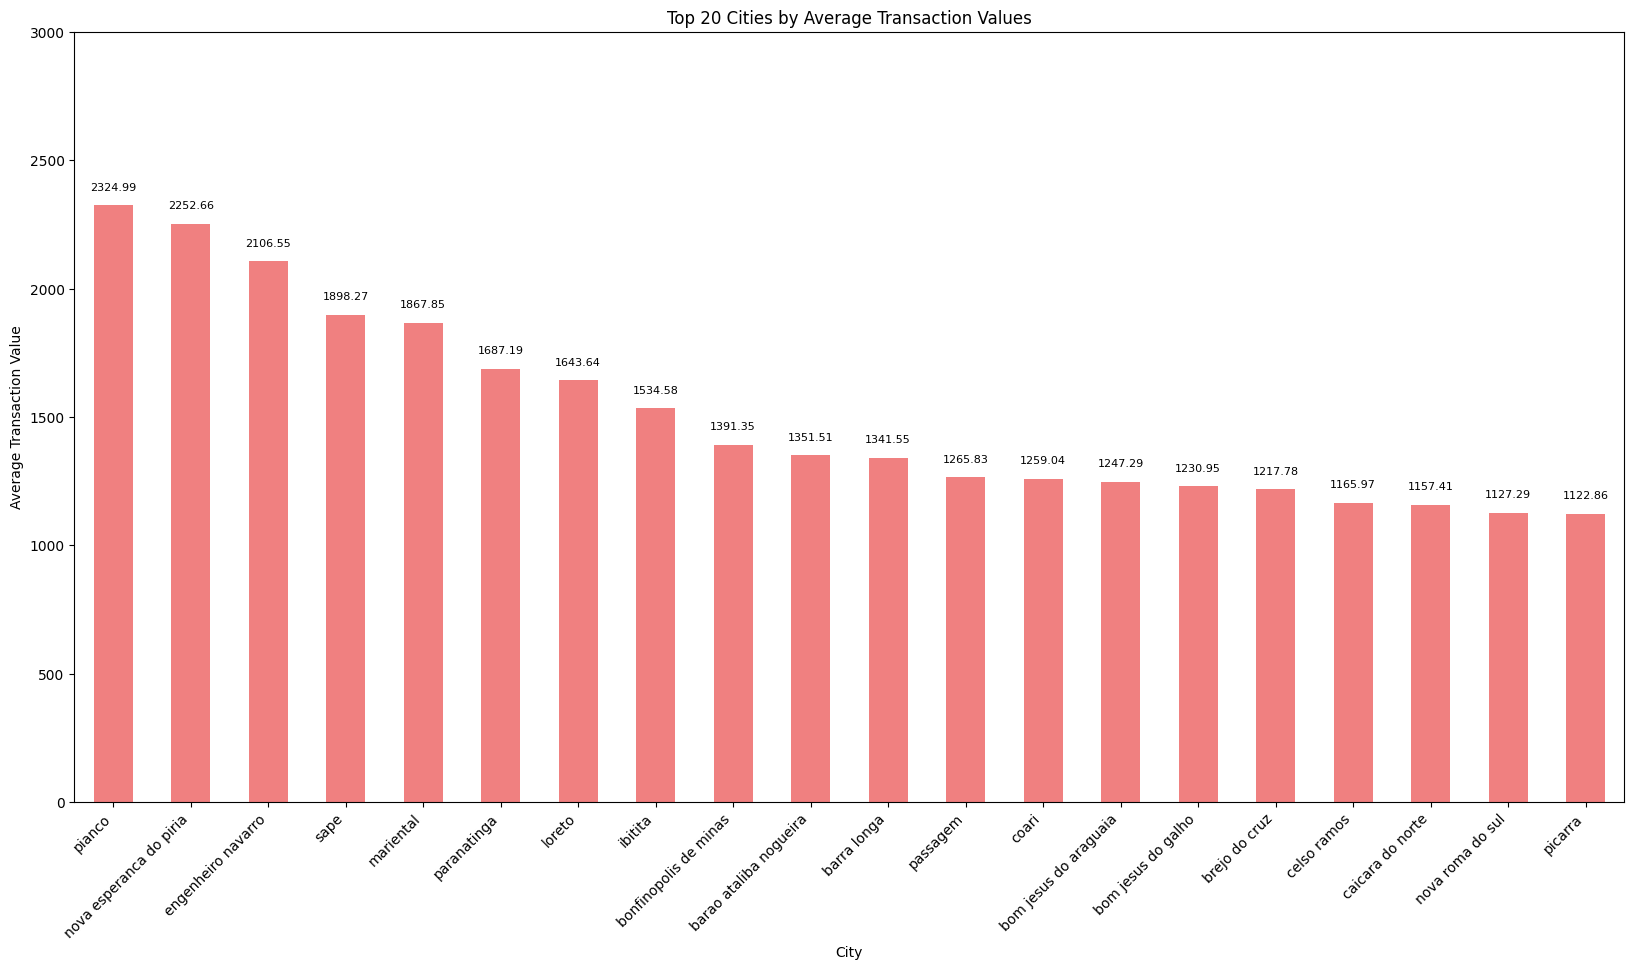

In [37]:
plt.figure(figsize=(20, 10))  # Adjust the figure size
top_cities_avg_transaction = average_transaction_values_per_city.sort_values(ascending=False).head(20)

# Plotting average transaction values for the top 20 cities
ax = top_cities_avg_transaction.plot(kind='bar', color='lightcoral')
plt.title('Top 20 Cities by Average Transaction Values')
plt.xlabel('City')
plt.ylabel('Average Transaction Value')
plt.ylim(0, 3000)  # Adjust the y-axis range based on your data
plt.xticks(rotation=45, ha='right')  # Rotate city labels for better visibility

# Annotate each bar with its value
for i, v in enumerate(top_cities_avg_transaction):
    ax.text(i, v + 50, f'{v:.2f}', ha='center', va='bottom', fontsize=8, color='black')

plt.show()

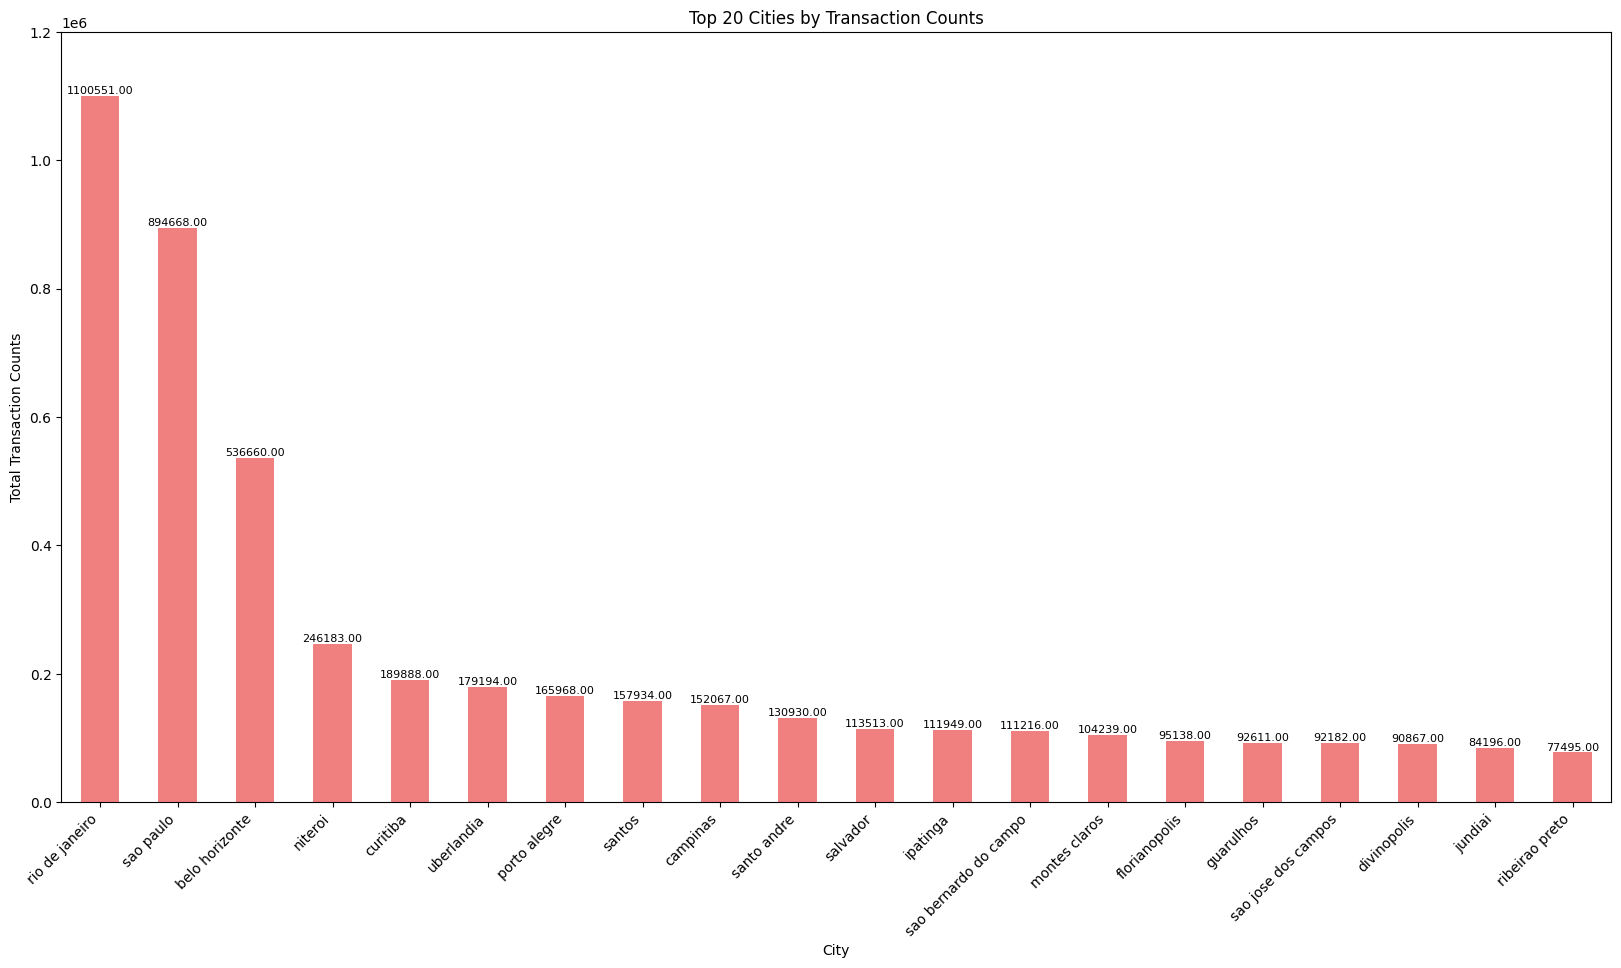

In [38]:
plt.figure(figsize=(20, 10))  # Adjust the figure size
top_cities_transaction = transaction_counts_per_city.sort_values(ascending=False).head(20)

# Plotting average transaction values for the top 20 cities
ax = top_cities_transaction.plot(kind='bar', color='lightcoral')
plt.title('Top 20 Cities by Transaction Counts')
plt.xlabel('City')
plt.ylabel('Total Transaction Counts')
plt.ylim(0, 1200000)  # Adjust the y-axis range based on your data
plt.xticks(rotation=45, ha='right')  # Rotate city labels for better visibility

# Annotate each bar with its value
for i, v in enumerate(top_cities_transaction):
    ax.text(i, v + 50, f'{v:.2f}', ha='center', va='bottom', fontsize=8, color='black')

plt.show()

### Pertanyaan 2: "How can we categorize customers based on their purchasing behavior and order details to optimize marketing strategies and improve overall customer satisfaction?"


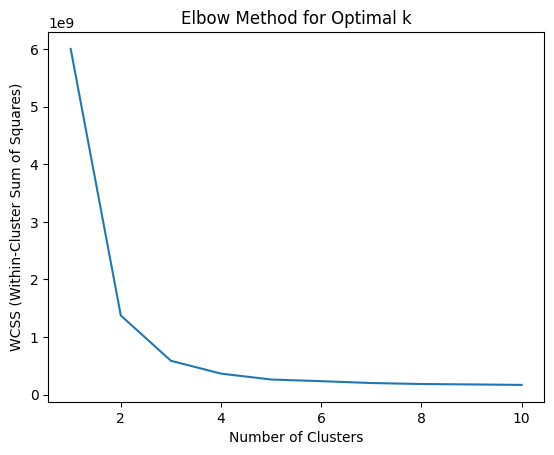

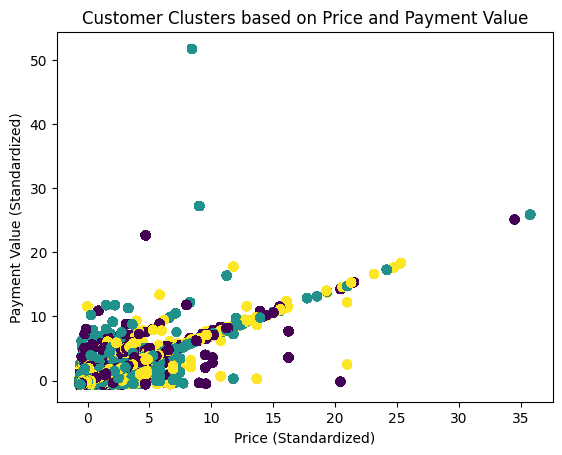

In [39]:
selected_columns = [
    'order_item_id', 'price', 'freight_value', 'payment_value',
    'payment_installments', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm'
]

# Extract selected columns
cluster_data = merged_data[selected_columns]

# Handle missing data if needed
# cluster_data = cluster_data.dropna()

# Feature Scaling - Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Categorical Variable Encoding - Label encode categorical variables
label_encoder = LabelEncoder()
merged_data['product_category_label'] = label_encoder.fit_transform(merged_data['product_category_name'])

# Add the encoded category label to the features
scaled_data_with_label = pd.concat([pd.DataFrame(scaled_data, columns=selected_columns), merged_data['product_category_label']], axis=1)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data_with_label)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, choose an optimal number of clusters
optimal_clusters = 3  # Replace with the optimal number you observed from the graph

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data_with_label)

# Visualize the clusters (2D scatter plot for simplicity)
plt.scatter(scaled_data_with_label['price'], scaled_data_with_label['payment_value'], c=cluster_labels, cmap='viridis')
plt.title('Customer Clusters based on Price and Payment Value')
plt.xlabel('Price (Standardized)')
plt.ylabel('Payment Value (Standardized)')
plt.show()

In [40]:
print("Hello")

Hello


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2